In [1]:
#importing libraries for dataset visuals
import matplotlib.pyplot as plt
from matplotlib.image import imread


Checking Images in training set


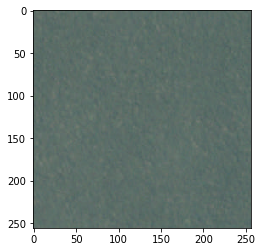

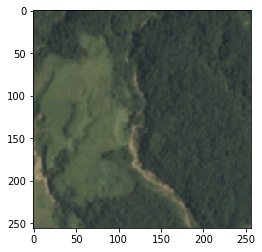

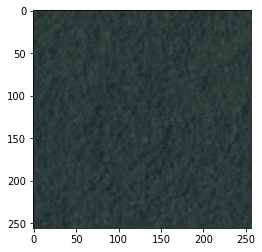

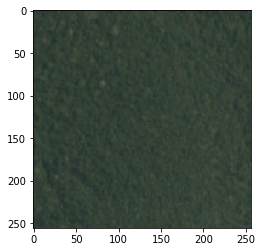

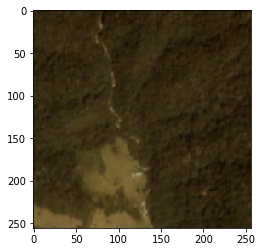

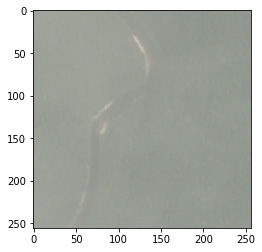

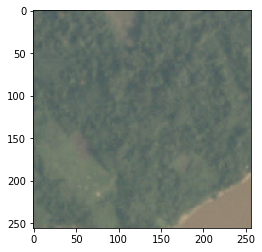

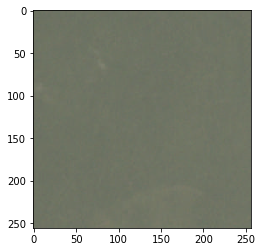

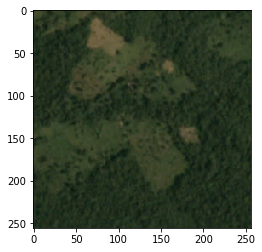

In [2]:
#checking the dataset images
for i in range(9):
    img = imread('C:/Users/Kabir Juenja/Desktop/train-jpg/' + 'train_' + str(i) + '.jpg')
    plt.imshow(img)
    plt.show()

In [3]:
import pandas as pd

In [4]:
y_train = pd.read_csv('C:/Users/Kabir Juenja/Desktop/train_v2_small.csv')

In [5]:
mapping = y_train
# mapping.drop( , axis=0)
mapping


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


Set of Tags

In [6]:
#tag_set is a set of all classes
tag_set = set()
for i in range(len(mapping)):
    tag_set.update(mapping['tags'][i].split(' '))
tag_set = list(tag_set)
tag_set.sort()
tag_set

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

Tag to Int Mapping

In [7]:
#tag_int is a dictionary where each tag/class corresponds to a number
#tag_int_inv is a inverse correspondance to tag_int
tag_int = {tag_set[i]: i for i in range(len(tag_set))}
inv_tag_int = {i:tag_set[i] for i in range(len(tag_set))}
inv_tag_int

{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}

In [8]:
#img_map contains each image to it's associated tags correspondance
img_map = dict()
for i in range(len(mapping)):
    name , tag = mapping['image_name'][i] , mapping['tags'][i]
    img_map[name] = tag.split(' ')
    

In [9]:
img_map

{'train_0': ['haze', 'primary'],
 'train_1': ['agriculture', 'clear', 'primary', 'water'],
 'train_2': ['clear', 'primary'],
 'train_3': ['clear', 'primary'],
 'train_4': ['agriculture', 'clear', 'habitation', 'primary', 'road'],
 'train_5': ['haze', 'primary', 'water'],
 'train_6': ['agriculture', 'clear', 'cultivation', 'primary', 'water'],
 'train_7': ['haze', 'primary'],
 'train_8': ['agriculture', 'clear', 'cultivation', 'primary'],
 'train_9': ['agriculture', 'clear', 'cultivation', 'primary', 'road'],
 'train_10': ['agriculture', 'clear', 'primary', 'slash_burn', 'water'],
 'train_11': ['clear', 'primary', 'water'],
 'train_12': ['cloudy'],
 'train_13': ['clear', 'primary'],
 'train_14': ['cloudy'],
 'train_15': ['clear', 'primary'],
 'train_16': ['clear', 'primary'],
 'train_17': ['partly_cloudy', 'primary'],
 'train_18': ['clear', 'primary'],
 'train_19': ['agriculture', 'clear', 'primary', 'road'],
 'train_20': ['agriculture', 'clear', 'primary', 'water'],
 'train_21': ['clea

Temporary Check

In [10]:
#temporarily check the pixel change and scaling factor and img to array conv.
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
photo = load_img('C:/Users/Kabir Juenja/Desktop/train-jpg/train_2.jpg' , target_size=(128,128))
photo = img_to_array(photo)
photo = photo/255.0
photo

Using TensorFlow backend.


array([[[0.16862746, 0.23921569, 0.22352941],
        [0.16862746, 0.22745098, 0.21960784],
        [0.15294118, 0.21960784, 0.21176471],
        ...,
        [0.18039216, 0.22745098, 0.22352941],
        [0.1882353 , 0.23529412, 0.22352941],
        [0.16078432, 0.21176471, 0.21176471]],

       [[0.18039216, 0.2509804 , 0.21960784],
        [0.18039216, 0.23529412, 0.22352941],
        [0.16078432, 0.21960784, 0.21176471],
        ...,
        [0.19215687, 0.2509804 , 0.23137255],
        [0.20392157, 0.24705882, 0.22745098],
        [0.15686275, 0.22352941, 0.21176471]],

       [[0.18431373, 0.24705882, 0.21960784],
        [0.1764706 , 0.23529412, 0.22745098],
        [0.14509805, 0.21176471, 0.21568628],
        ...,
        [0.1764706 , 0.25490198, 0.21960784],
        [0.16862746, 0.24705882, 0.22352941],
        [0.17254902, 0.24313726, 0.22745098]],

       ...,

       [[0.16078432, 0.21568628, 0.22745098],
        [0.16470589, 0.21176471, 0.21176471],
        [0.15294118, 0

One Hot Encoding

In [11]:
# defining our own onehot encoding function
import numpy as np
def one_hot_encode(tag_set,tags,tag_int):
    # create empty vector
    encoding = np.zeros(len(tag_set), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in tags:
        encoding[tag_int[tag]] = 1
    return encoding

In [12]:
# photos = image matrices for each image in training set
# targets = one hot encoded tags of training set
from os import listdir
folder = 'C:/Users/Kabir Juenja/Desktop/train-jpg-small/'
path = 'C:/Users/Kabir Juenja/Desktop/train-jpg-small/'
photos, targets = list(), list()
for filename in listdir(folder):
    photo = load_img(path + filename, target_size=(128,128))
    photo = img_to_array(photo, dtype='uint8')
    # scaling
    photo = photo / 255.0
    tags = img_map[filename[:-4]]
    target = one_hot_encode(tag_set,tags, tag_int)
    photos.append(photo)
    targets.append(target)


In [13]:
# printing shapes
X = np.array(photos) 
Y = np.array(targets)
print(X.shape,Y.shape)
# print(photos)

(14999, 128, 128, 3) (14999, 17)


In [14]:
X

array([[[[0.36078431, 0.42745098, 0.39215686],
         [0.37647059, 0.43921569, 0.40392157],
         [0.40392157, 0.44705882, 0.42352941],
         ...,
         [0.34509804, 0.41176471, 0.39607843],
         [0.37254902, 0.43137255, 0.4       ],
         [0.36862745, 0.42352941, 0.40392157]],

        [[0.35294118, 0.41568627, 0.39215686],
         [0.36470588, 0.42745098, 0.40392157],
         [0.38823529, 0.44313725, 0.41960784],
         ...,
         [0.35294118, 0.41176471, 0.39607843],
         [0.35294118, 0.41568627, 0.39215686],
         [0.34901961, 0.41960784, 0.39607843]],

        [[0.36470588, 0.42352941, 0.40784314],
         [0.36862745, 0.42352941, 0.40392157],
         [0.36862745, 0.43529412, 0.4       ],
         ...,
         [0.36078431, 0.43529412, 0.40784314],
         [0.3372549 , 0.41960784, 0.39607843],
         [0.34117647, 0.41960784, 0.38431373]],

        ...,

        [[0.36470588, 0.43921569, 0.41176471],
         [0.37647059, 0.44313725, 0.41176471]

Model Starts from here

In [15]:
# making a sequential model in keras
from keras.models import Sequential

In [16]:
# defining input and output shapes
model = Sequential()
in_shape = (128,128,3)
out_shape  = 17

In [17]:
#importing useful layers 
from keras.layers import Conv2D , MaxPooling2D , Dropout, Flatten, Dense

Model Architecture

In [18]:
# adding layers sequentially to our model
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(out_shape, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model Compilation / Optimizer Setting

In [19]:
# model compilation
# using stochastic gradient descent for optimizing our model
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


Model Summary

In [20]:
# checking model credentials
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
__________

Fitting Model

In [21]:
# fitting our model to X and Y
model.fit(X , Y , epochs= 20  , batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
14999/14999 [==============================] - 1026s 68ms/step - loss: 0.3080 - acc: 0.8871
Epoch 2/20
14999/14999 [==============================] - 899s 60ms/step - loss: 0.2523 - acc: 0.9069
Epoch 3/20
14999/14999 [==============================] - 904s 60ms/step - loss: 0.2417 - acc: 0.9108
Epoch 4/20
14999/14999 [==============================] - 900s 60ms/step - loss: 0.2338 - acc: 0.9130
Epoch 5/20
14999/14999 [==============================] - 1066s 71ms/step - loss: 0.2309 - acc: 0.9133
Epoch 6/20
14999/14999 [==============================] - 983s 66ms/step - loss: 0.2257 - acc: 0.9145
Epoch 7/20
14999/14999 [==============================] - 892s 59ms/step - loss: 0.2226 - acc: 0.9152
Epoch 8/20
14999/14999 [==============================] - 912s 61ms/step - loss: 0.2191 - acc: 0.9165
Epoch 9/20
14999/14999 [==============================] - 991s 66ms/step - loss: 0.2163 - acc: 0.9166
Epoch 10/20
14999/14999 [=======

In [22]:
# rest of the code can be easily understood if you understand the previous code
# we have applied almost all similar functions to the testing dataset, that's all!

y_test = pd.read_csv('C:/Users/Kabir Juenja/Desktop/test_v2_small.csv')
y_test

,image_name,tags
0,train_15000,agriculture blooming clear cultivation primary
1,train_15001,agriculture clear primary road
2,train_15002,clear primary
3,train_15003,agriculture clear habitation primary road
4,train_15004,clear primary
5,train_15005,haze primary
6,train_15006,agriculture clear cultivation primary road
7,train_15007,agriculture clear primary
8,train_15008,clear primary water
9,train_15009,agriculture clear primary road


In [23]:
img_map_test= dict()
for i in range(len(y_test)):
    name , tag = y_test['image_name'][i] , y_test['tags'][i]
    img_map_test[name] = tag.split(' ')
    

In [24]:
len(img_map_test)



5000

In [25]:
folder = 'C:/Users/Kabir Juenja/Desktop/test-jpg-small/'
path = 'C:/Users/Kabir Juenja/Desktop/test-jpg-small/'
photos_test, targets_test = list(), list()
for filename in listdir(folder):
    photo_test = load_img(path + filename, target_size=(128,128))
    photo_test = img_to_array(photo_test, dtype='uint8')
    photo_test = photo_test / 255.0
    tags = img_map_test[filename[:-4]]

    target_test = one_hot_encode(tag_set,tags, tag_int)
    photos_test.append(photo_test)
    targets_test.append(target_test)

In [26]:
targets_test

[array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=uint8),
 array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=uint8),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=uint8),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=uint8),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [27]:
photos_test = np.array(photos_test)
targets_test = np.array(targets_test)
photos_test

array([[[[0.37647059, 0.39607843, 0.32156863],
         [0.37254902, 0.38039216, 0.31372549],
         [0.38431373, 0.41176471, 0.32941176],
         ...,
         [0.54509804, 0.51372549, 0.39215686],
         [0.51764706, 0.48627451, 0.38039216],
         [0.50980392, 0.48235294, 0.37647059]],

        [[0.36470588, 0.38039216, 0.31372549],
         [0.36862745, 0.37647059, 0.30980392],
         [0.39607843, 0.41568627, 0.3372549 ],
         ...,
         [0.51764706, 0.50980392, 0.39215686],
         [0.49411765, 0.48627451, 0.38431373],
         [0.50196078, 0.49019608, 0.38039216]],

        [[0.36470588, 0.38431373, 0.32156863],
         [0.38823529, 0.37254902, 0.32156863],
         [0.38039216, 0.38039216, 0.31764706],
         ...,
         [0.50980392, 0.49411765, 0.39215686],
         [0.48627451, 0.4745098 , 0.37647059],
         [0.49411765, 0.48627451, 0.37254902]],

        ...,

        [[0.36862745, 0.37647059, 0.31372549],
         [0.3372549 , 0.35686275, 0.28627451]

In [29]:
# predicting the results for testing data
# ypred contains probability of tagging of each class
ypred = model.predict(photos_test)

In [30]:
ypred

array([[0.7947377 , 0.01278403, 0.06190529, ..., 0.00902006, 0.00684461,
        0.25395375],
       [0.74195915, 0.0138934 , 0.06046933, ..., 0.01405007, 0.00885081,
        0.28807825],
       [0.07012242, 0.00346205, 0.01035509, ..., 0.01556796, 0.00912526,
        0.08006337],
       ...,
       [0.6639194 , 0.03120044, 0.06591594, ..., 0.01169661, 0.01307485,
        0.35234025],
       [0.07980892, 0.0029822 , 0.00900912, ..., 0.01290432, 0.0090906 ,
        0.07095009],
       [0.05837584, 0.00386411, 0.00899765, ..., 0.01306358, 0.01072913,
        0.07203737]], dtype=float32)

In [31]:
print(photos_test.shape)
print(targets_test.shape)
# score evaluation or accuracy on the test set
score = model.evaluate(photos_test,targets_test)
score


(5000, 128, 128, 3)
(5000, 17)
5000/5000 [==============================] - 100s 20ms/step


[0.1859953994989395, 0.9241646843910217]

In [55]:
print(ypred.shape)
# setting all the classes with probability > 0.1 as 1 and others as 0
# probability > 0.08 and 0.15 have also been analysed but 0.1 gives promising results
y_pred_temp = np.empty((5000,17))
for i in range(5000):
    for j in  range(17):
        if(ypred[i][j]>=0.1):
            y_pred_temp[i][j]=1
        else:
            y_pred_temp[i][j]=0
print(y_pred_temp)


(5000, 17)
[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
# checking for a random test set image
y_pred_temp[35]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [59]:
# prediction is exactly the same
targets_test[35]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

0            train_0
1            train_1
2            train_2
3            train_3
4            train_4
5            train_5
6            train_6
7            train_7
8            train_8
9            train_9
10          train_10
11          train_11
12          train_12
13          train_13
14          train_14
15          train_15
16          train_16
17          train_17
18          train_18
19          train_19
20          train_20
21          train_21
22          train_22
23          train_23
24          train_24
25          train_25
26          train_26
27          train_27
28          train_28
29          train_29
            ...     
14969    train_14969
14970    train_14970
14971    train_14971
14972    train_14972
14973    train_14973
14974    train_14974
14975    train_14975
14976    train_14976
14977    train_14977
14978    train_14978
14979    train_14979
14980    train_14980
14981    train_14981
14982    train_14982
14983    train_14983
14984    train_14984
14985    trai

array([[ 5,  7,  9, 12]], dtype=int64)

In [165]:
# we can print tags from output vector if we want 
# templist = list(inv_tag_int.values())
# # print(templist)
# for i in range(len(check[0])):
#     print(templist[check[0][i]])
# # inv_tag_int


clear
conventional_mine
habitation
primary


array([[ 5, 12]], dtype=int64)